In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv("Food Loss and Waste.csv")
data.duplicated().sum()

158

In [4]:
data["activity"].unique()

array(['Storage', 'Drying, Harvesting', 'Shelling, Threshing',
       'Transportation', 'Drying', 'Winnowing', 'Milling', 'Parboiling',
       nan, 'Farm', 'Retailing', 'Wholesale', 'Collection',
       'Farm, Marketing, Storage, Transportation', 'Processing, Ripening',
       'Consumption', 'Packaging, Processing', 'Handling, Storage',
       'Distribution', 'Harvesting',
       'Cleaning, Collection, Distribution, Drying, Field, Harvesting, Shelling, Storage, Threshing, Transportation',
       'Marketing', 'Drying, Farm', 'Processing', 'Handling',
       'Handling, Harvesting', 'Collection, Marketing',
       'Marketing, Wholesale', 'Harvesting, Sorting', 'Grading, Sorting',
       'Threshing', 'Sorting', 'Distribution, Retailing', 'Peeling',
       'Marketing, Storage', 'Distribution, Trading', 'Stacking',
       'Storage, Trading', 'Exporting', 'Manufacturing', 'Trading',
       'Farm, Threshing', 'Cleaning, Farm', 'Farm, Handling, Storage',
       'Handling, Trading, Transportatio

In [5]:
#clear duplicates
data = data.drop_duplicates()
print(data.duplicated().sum())

non_cereal_crops= ['Beans, dry', 'Fonio','Peas, dry', 'Cow peas, dry', 'Quinoa',
       'Broad beans and horse beans, dry', 'Lentils, dry', 'Flour of buckwheat', 'Mixed grain',
       'Other pulses n.e.c.','Uncooked pasta, not stuffed or otherwise prepared',
       'Chick peas, dry', 'Pigeon peas, dry','Bambara beans, dry','Flour of triticale']

data = data[~data['commodity'].isin(non_cereal_crops)]

data["commodity"].unique()

0


array(['Rice, milled', 'Wheat', 'Maize (corn)', 'Rice', 'Sorghum',
       'Millet', 'Tomatoes', 'Cauliflowers and broccoli',
       'Cucumbers and gherkins', 'Other beans, green', 'Potatoes',
       'Bananas', 'Plantains and cooking bananas',
       'Meat of cattle with the bone, fresh or chilled',
       'Snails, fresh, chilled, frozen, dried, salted or in brine, except sea snails',
       'Other fruits, n.e.c.', 'Cabbages', 'Eggplants (aubergines)',
       'Pumpkins, squash and gourds', 'Okra', 'Carrots and turnips',
       'Leeks and other alliaceous vegetables', 'Papayas', 'Pineapples',
       'Edible roots and tubers with high starch or inulin content, n.e.c., fresh',
       'Raw milk of cattle', 'Hen eggs in shell, fresh', 'Pears',
       'Meat of chickens, fresh or chilled', 'Green garlic',
       'Onions and shallots, green', 'Apples',
       'Mangoes, guavas and mangosteens', 'Spinach',
       'Cantaloupes and other melons', 'Other vegetables, fresh n.e.c.',
       'Avocados',

In [6]:
# Drop columns
columns_to_drop = ["m49_code", "region", "cpc_code", "method_data_collection",
                   "reference", "url", "notes", "sample_size","loss_percentage_original","food_supply_stage"]
data.drop(columns_to_drop, axis=1, inplace=True)
# Initialize an empty list to store the new rows
new_rows = []

# Iterate through each row in the DataFrame
for index, row in data.iterrows():
    # Check if the "activity" column is a string
    if isinstance(row["activity"], str):
        # Split the "activity" column by comma (,) if it's a string
        activities = row["activity"].split(", ")

        # Create a new row for each activity and append it to the new_rows list
        for activity in activities:
            new_row = row.copy()  # Create a copy of the original row
            new_row["activity"] = activity  # Set the "activity" column to the split value
            new_rows.append(new_row)  # Append the new row to the list

# Drop the original rows from the original DataFrame
data.drop(data.index, inplace=True)

# Create a new DataFrame from the list of new rows
new_data = pd.DataFrame(new_rows)

# Add the new rows to the current dataset
data = pd.concat([data, new_data], ignore_index=True)
len(data["activity"].unique())


47

In [7]:
def map_to_stage(activity1):
    if activity1 in ['Winnowing','Farm', 'Field','Harvesting', 'Shelling', 'Threshing', 'Parboiling', 'Collection',
                     'Stacking', 'Grading', 'Sorting','Bundling','Piling','Cleaning']:
        return 'Agricultural Production'
    elif activity1 in ['Drying','Storage','Loading', 'Unloading', 'Handling']:
        return 'Post-Harvest Handling and Storage'
    elif activity1 in ['Transportation', 'Distribution', 'Retailing','Wholesale','Marketing']:
        return 'Distribution'
    elif activity1 in ['Consumption']:
        return 'Consumption'
    elif activity1 in ['Milling','Processing', 'Packaging','Assembling','Cleaning','Bagging','Manufacturing','Ripening']:
        return 'Processing and Packaging'
    else:
        return 'Other'


# Apply the mapping function to create the "Stage" column
data['Stage'] = data['activity'].apply(map_to_stage)

data.head()

,country,commodity,year,loss_percentage,loss_quantity,activity,treatment,cause_of_loss,Stage
0,Myanmar,"Rice, milled",2015,1.78,26.12kgs,Storage,"30 days storage, with trapping",Rodents,Post-Harvest Handling and Storage
1,Myanmar,"Rice, milled",2015,11.77,88.18kgs,Storage,"60 days storage, no trapping",Rodents,Post-Harvest Handling and Storage
2,Myanmar,"Rice, milled",2015,5.88,44.09kgs,Storage,"30 days storage, no trapping",Rodents,Post-Harvest Handling and Storage
3,Myanmar,"Rice, milled",2015,3.57,52.24kgs,Storage,"60 days storage, with trapping",Rodents,Post-Harvest Handling and Storage
4,Myanmar,"Rice, milled",2015,17.65,132.27kgs,Storage,"90 days storage, no trapping",Rodents,Post-Harvest Handling and Storage


In [ ]:
country_to_continent = {
    'Myanmar': 'Asia', 'Burundi' : 'Africa', 'Western Africa':'Africa', 'Cameroon':'Africa', 'Chad':'Africa','China':'Asia',
    'Democratic Republic of the Congo':'Africa','Sub-Saharan Africa':'Africa','Benin':'Africa','Ethiopia':'Africa',
    'Angola':'Africa','Finland':'Europe','Gambia':'Africa','Ghana':'Africa','Guinea':'Africa','India':'Asia',
    'Indonesia':'Asia',"Côte d'Ivoire":'Africa','Kenya':'Africa','Republic of Korea':'Asia', 'Liberia':'Africa',
    'Madagascar':'Africa', 'Malawi':'Africa', 'Malaysia':'Asia','Mali':'Africa', 'Mauritania':'Africa', 'Mexico':'America',
    'Bangladesh':'Asia', 'Mozambique':'Africa','Nepal':'Asia', 'Nicaragua':'America', 'Niger':'Africa', 'Nigeria':'Africa',
    'Philippines':'Asia','Guinea-Bissau':'Africa', 'Timor-Leste':'Asia', 'Rwanda':'Africa','Bolivia (Plurinational State of)':'America',
    'Saudi Arabia':'Asia', 'Senegal':'Africa','Sierra Leone':'Africa',
    'Viet Nam':'Asia', 'Somalia':'Africa', 'Brazil':'America', 'Thailand':'Asia','Togo':'Africa',
    'Uganda':'Africa', 'United Republic of Tanzania':'Africa', 'Burkina Faso':'Africa', 'Zambia':'Africa'
}

data['Continent'] = data['country'].map(country_to_continent)

In [ ]:
rice = data[data["commodity"].str.contains('rice', case=False)]
rice.to_csv("rice_only.csv",index=False)
data.to_csv("cereal_crops_only.csv",index=False)
rice.head()

,country,commodity,year,loss_percentage,loss_quantity,activity,treatment,cause_of_loss,Stage,Continent
0,Myanmar,"Rice, milled",2015,1.78,26.12kgs,Storage,"30 days storage, with trapping",Rodents,Post-Harvest Handling and Storage,Asia
1,Myanmar,"Rice, milled",2015,11.77,88.18kgs,Storage,"60 days storage, no trapping",Rodents,Post-Harvest Handling and Storage,Asia
2,Myanmar,"Rice, milled",2015,5.88,44.09kgs,Storage,"30 days storage, no trapping",Rodents,Post-Harvest Handling and Storage,Asia
3,Myanmar,"Rice, milled",2015,3.57,52.24kgs,Storage,"60 days storage, with trapping",Rodents,Post-Harvest Handling and Storage,Asia
4,Myanmar,"Rice, milled",2015,17.65,132.27kgs,Storage,"90 days storage, no trapping",Rodents,Post-Harvest Handling and Storage,Asia


In [ ]:
data.dropna()
rice.dropna()
print(data.shape)
print(rice.shape)

(26370, 10)
(5818, 10)


**Mean Loss Percentage over years by commodity**

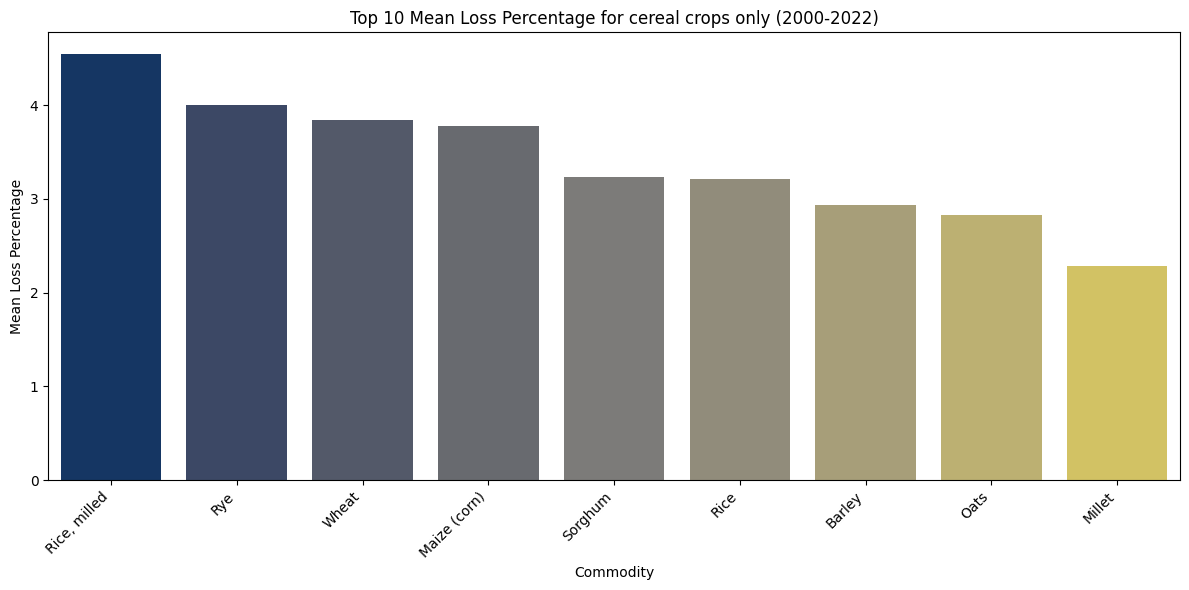

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

mean_loss_by_commodity = data.groupby('commodity')['loss_percentage'].mean()

top_10_commodities = mean_loss_by_commodity.nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_commodities.index, y=top_10_commodities.values, palette="cividis")
plt.title('Top 10 Mean Loss Percentage for cereal crops only (2000-2022)')
plt.xlabel('Commodity')
plt.ylabel('Mean Loss Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Mean Loss Percentage for rice by country (2000-2022)**

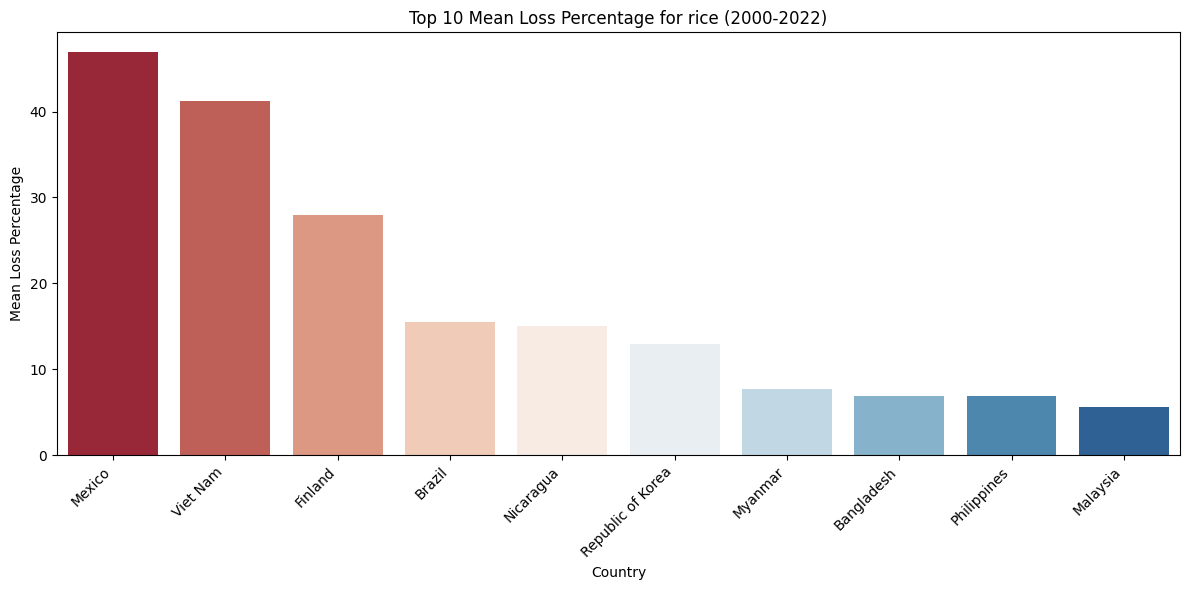

In [ ]:
mean_loss_by_country = rice.groupby('country')['loss_percentage'].mean()
top_10_countries = mean_loss_by_country.nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette="RdBu")
plt.title("Top 10 Mean Loss Percentage for rice (2000-2022)")
plt.xlabel('Country')
plt.ylabel('Mean Loss Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


***Asia***

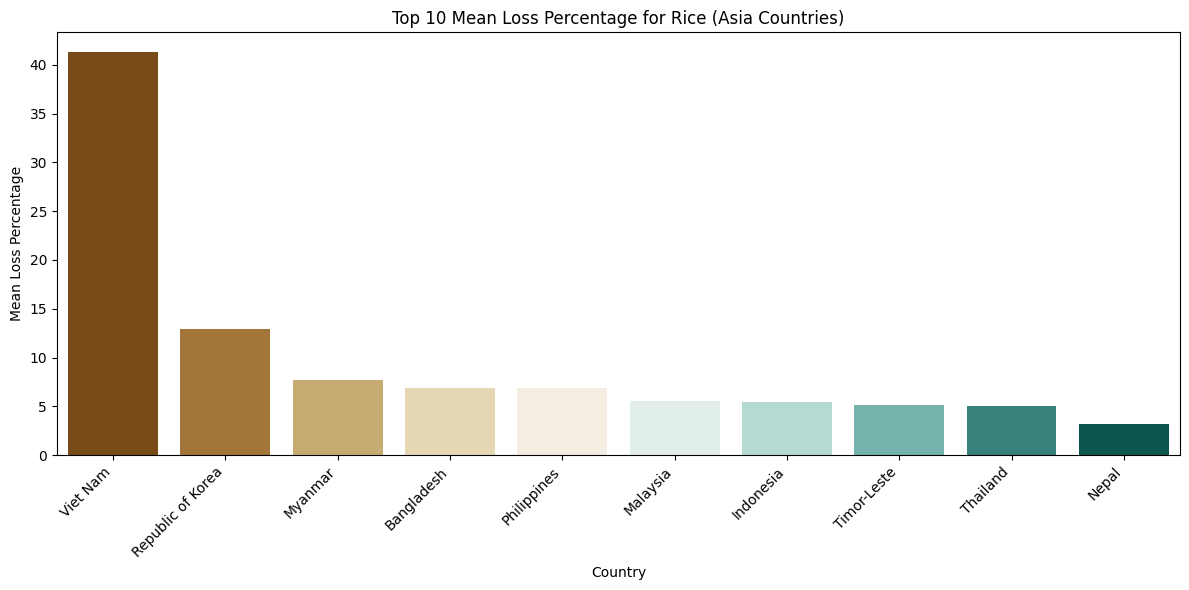

In [ ]:
asia = rice[rice["Continent"] == "Asia"]
mean_loss_by_country = asia.groupby('country')['loss_percentage'].mean()
top_10_asian_countries = mean_loss_by_country.nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_asian_countries.index, y=top_10_asian_countries.values, palette="BrBG")
plt.title('Top 10 Mean Loss Percentage for Rice (Asia Countries)')
plt.xlabel('Country')
plt.ylabel('Mean Loss Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

In [ ]:
df = pd.DataFrame(asia)
df.to_csv(asia, index=False)

NameError: ignored

***Africa***

In [ ]:
rice["Continent"].unique()

array(['Asia', 'Africa', 'Europe', 'America'], dtype=object)

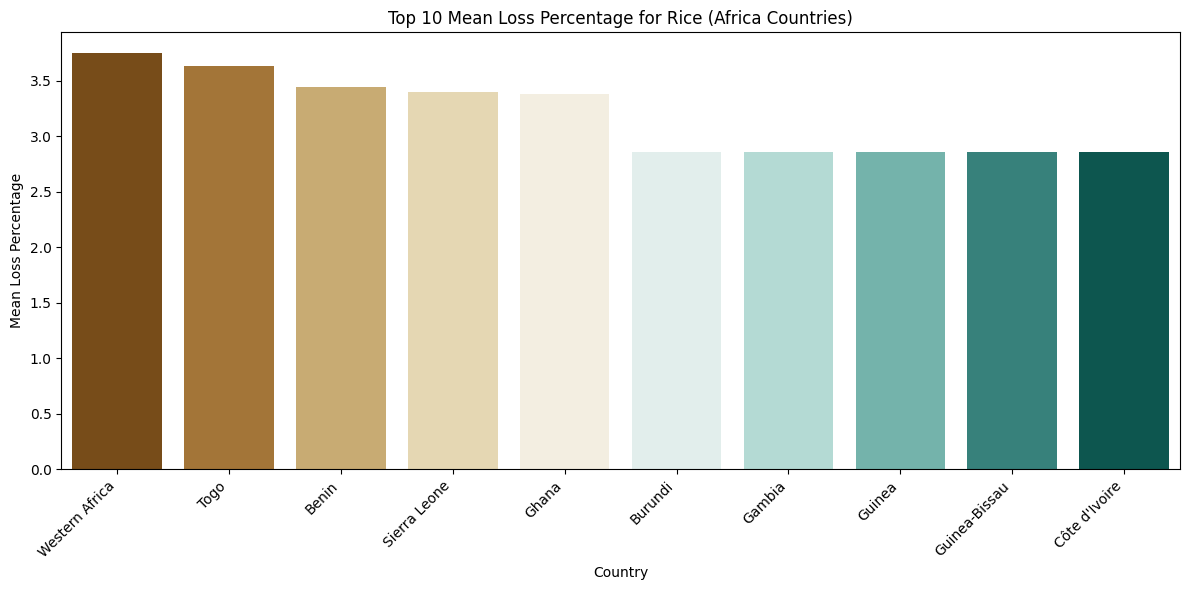

In [ ]:
africa = rice[rice["Continent"] == "Africa"]
mean_loss_africa = africa.groupby('country')['loss_percentage'].mean()
top_10_africa_countries = mean_loss_africa.nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_africa_countries.index, y=top_10_africa_countries.values, palette="BrBG")
plt.title('Top 10 Mean Loss Percentage for Rice (Africa Countries)')
plt.xlabel('Country')
plt.ylabel('Mean Loss Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

***Europe***

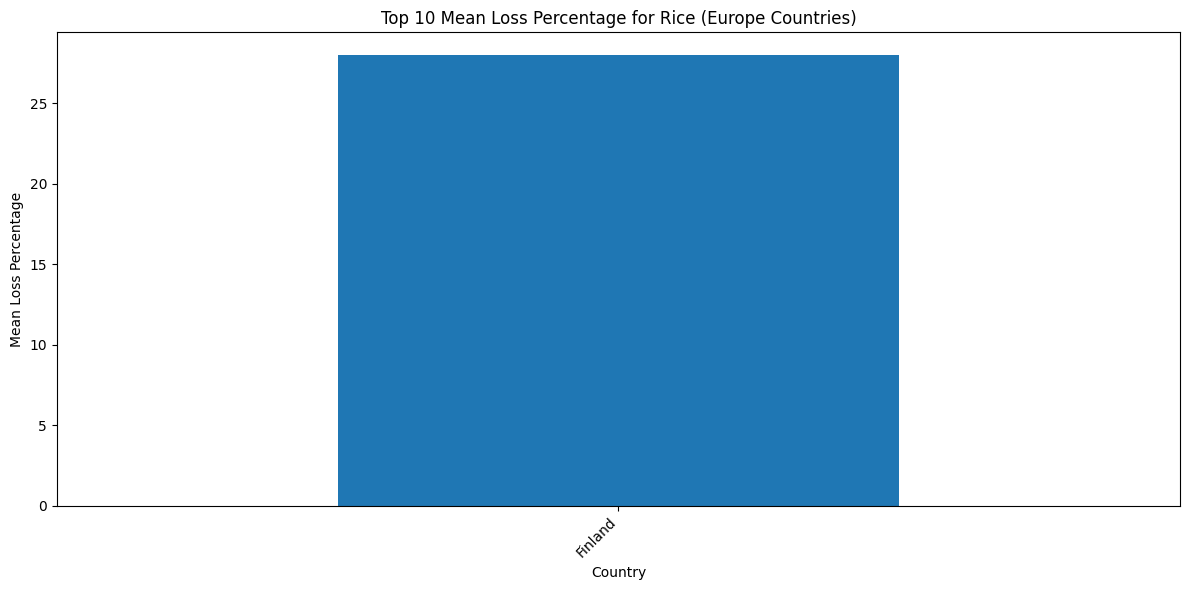

In [ ]:
europe = rice[rice["Continent"] == "Europe"]
mean_loss_europe = europe.groupby('country')['loss_percentage'].mean()
top_10_europe_countries = mean_loss_europe.nlargest(10)

top_10_europe_countries.plot(kind='bar', figsize=(12, 6))
plt.title('Top 10 Mean Loss Percentage for Rice (Europe Countries)')
plt.xlabel('Country')
plt.ylabel('Mean Loss Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

***America***

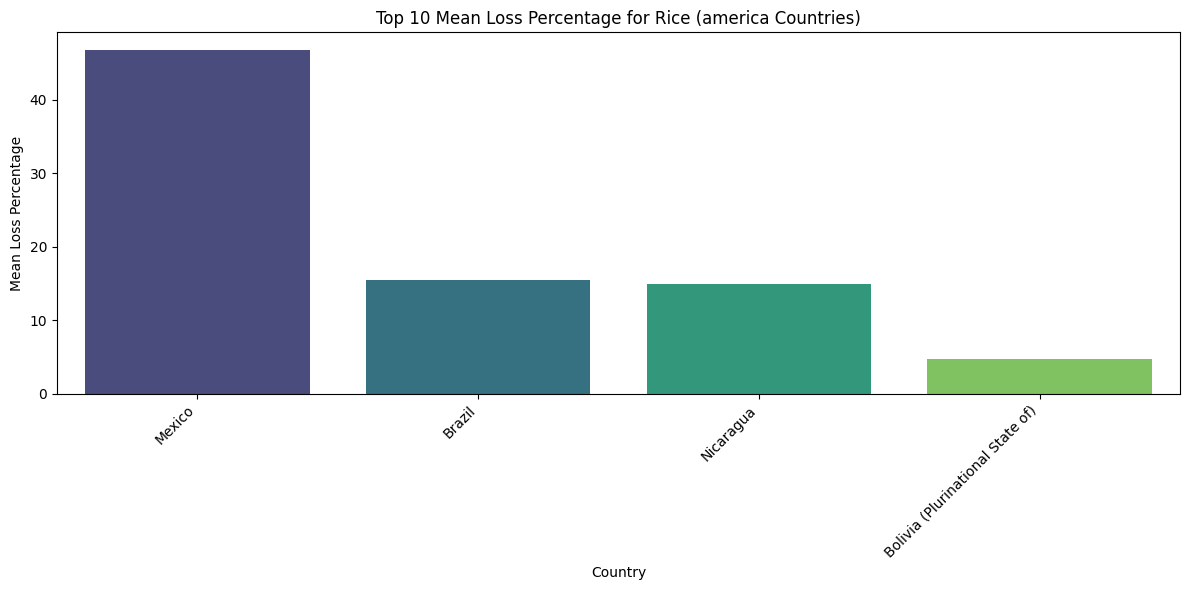

In [ ]:
america = rice[rice["Continent"] == "America"]
mean_loss_america = america.groupby('country')['loss_percentage'].mean()
top_10_america_countries = mean_loss_america.nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_america_countries.index, y=top_10_america_countries.values, palette="viridis")
plt.title('Top 10 Mean Loss Percentage for Rice (america Countries)')
plt.xlabel('Country')
plt.ylabel('Mean Loss Percentage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

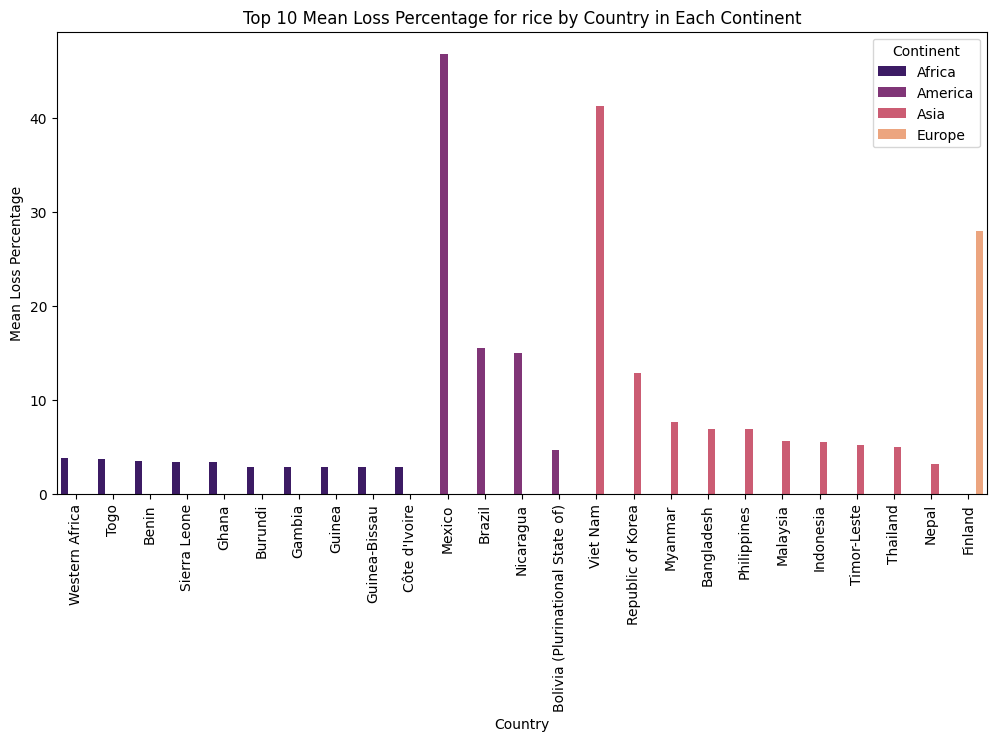

In [ ]:
import seaborn as sns
mean_loss_by_country = rice.groupby(['Continent', 'country'])['loss_percentage'].mean()
mean_loss_by_country = mean_loss_by_country.reset_index()

# Select the top 10 countries with the highest mean loss percentage in descending order
top_10_countries = mean_loss_by_country.groupby('Continent').apply(lambda x: x.nlargest(10, 'loss_percentage')).reset_index(drop=True)

# Plot a bar chart for each continent
plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='loss_percentage', hue='Continent', data=top_10_countries,palette="magma")
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Mean Loss Percentage')
plt.title('Top 10 Mean Loss Percentage for rice by Country in Each Continent')
plt.show()

**Mean Loss Percentage by Stage**

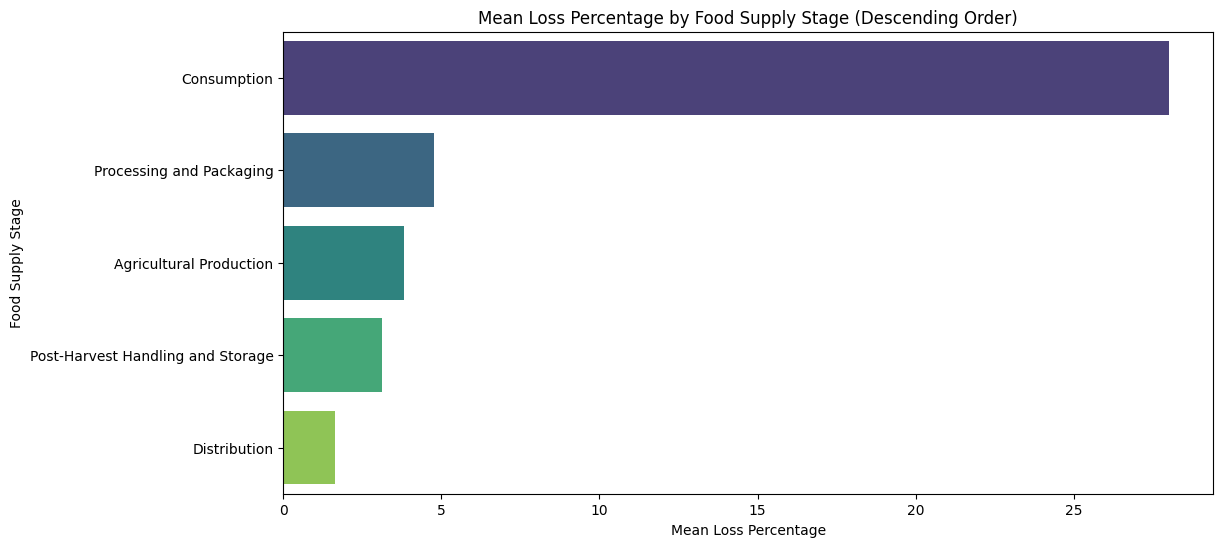

In [ ]:
mean_loss_by_stage = rice.groupby('Stage')['loss_percentage'].mean().reset_index()

# Sort the data in descending order by mean loss percentage
mean_loss_by_stage = mean_loss_by_stage.sort_values(by='loss_percentage', ascending=False)

# Create a bar chart for mean loss percentage by food supply stage
plt.figure(figsize=(12, 6))
sns.barplot(x='loss_percentage', y='Stage', data=mean_loss_by_stage, palette='viridis')
plt.xlabel('Mean Loss Percentage')
plt.ylabel('Food Supply Stage')
plt.title('Mean Loss Percentage by Food Supply Stage (Descending Order)')
plt.show()

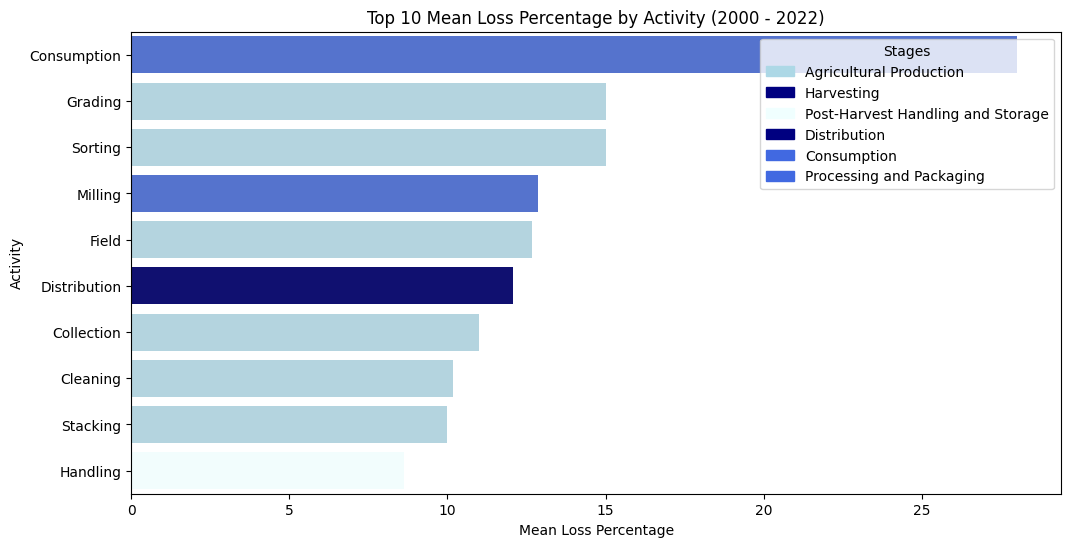

In [ ]:
# Calculate the mean loss percentage by activity
mean_loss_by_activity = rice.groupby('activity')['loss_percentage'].mean().reset_index()

# Apply the map_to_stage function to create a 'Stage' column
mean_loss_by_activity['Stage'] = mean_loss_by_activity['activity'].apply(map_to_stage)

# Select the top 10 activities with the highest mean loss percentage in descending order
top10_loss_by_activity = mean_loss_by_activity.nlargest(10, 'loss_percentage')

# Create a custom color palette for stages
stage_palette = {
    'Agricultural Production': 'lightblue',
    'Harvesting': 'navy',
    'Post-Harvest Handling and Storage': 'azure',
    'Distribution': 'navy',
    'Consumption': 'royalblue',
    'Processing and Packaging': 'royalblue',
}

# Create a bar chart for mean loss percentage by activity using the 'Stage' column for colors
plt.figure(figsize=(12, 6))
sns.barplot(x='loss_percentage', y='activity', data=top10_loss_by_activity, palette=[stage_palette[stage] for stage in top10_loss_by_activity['Stage']])
plt.xlabel('Mean Loss Percentage')
plt.ylabel('Activity')
plt.title('Top 10 Mean Loss Percentage by Activity (2000 - 2022)')

# Create a legend for the color mapping
handles = [plt.Rectangle((0, 0), 1, 1, color=stage_palette[stage]) for stage in stage_palette]
plt.legend(handles, stage_palette.keys(), title='Stages', loc='upper right')

plt.show()


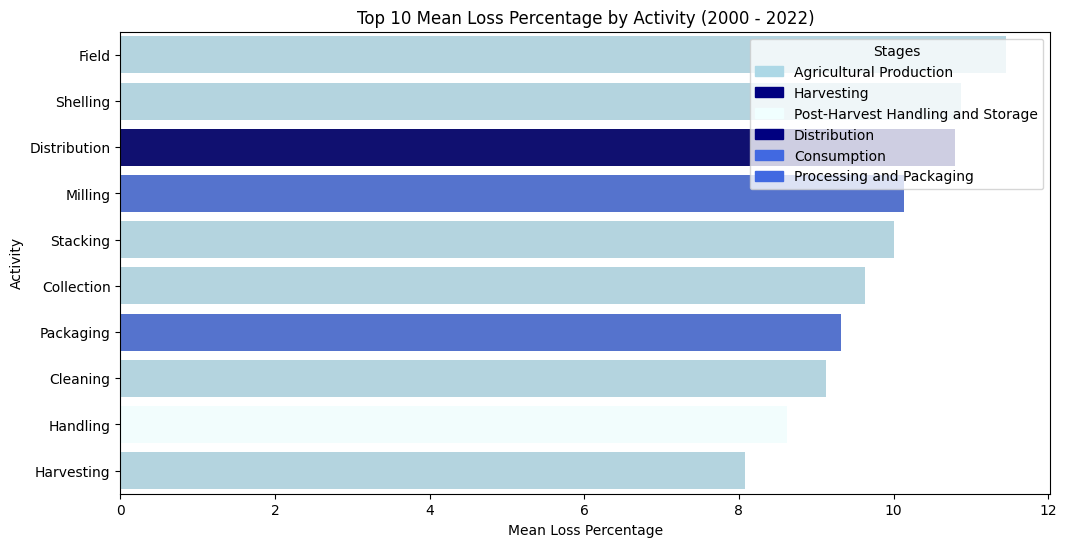

In [ ]:
asia_loss_by_activity = asia.groupby('activity')['loss_percentage'].mean().reset_index()

# Select the top 10 activities with the highest mean loss percentage in descending order
top10_loss_by_activity = asia_loss_by_activity.nlargest(10, 'loss_percentage')
top10_loss_by_activity['Stage']=top10_loss_by_activity['activity'].map(map_to_stage)
# Create a bar chart for mean loss percentage by activity
plt.figure(figsize=(12, 6))
sns.barplot(x='loss_percentage', y='activity', data=top10_loss_by_activity, palette=[stage_palette[stage] for stage in top10_loss_by_activity['Stage']])

plt.xlabel('Mean Loss Percentage')
plt.ylabel('Activity')
plt.title('Top 10 Mean Loss Percentage by Activity (2000 - 2022)')
handles = [plt.Rectangle((0, 0), 1, 1, color=stage_palette[stage]) for stage in stage_palette]
plt.legend(handles, stage_palette.keys(), title='Stages', loc='upper right')
plt.show()

In [ ]:
rice["activity"].unique()

array(['Storage', 'Winnowing', 'Transportation', 'Drying', 'Harvesting',
       'Shelling', 'Threshing', 'Milling', 'Parboiling', 'Distribution',
       'Farm', 'Processing', 'Retailing', 'Consumption', 'Cleaning',
       'Assembling', 'Packaging', 'Marketing', 'Loading', 'Unloading',
       'Bagging', 'Collection', 'Field', 'Wholesale', 'Stacking',
       'Handling', 'Grading', 'Sorting', 'Manufacturing'], dtype=object)

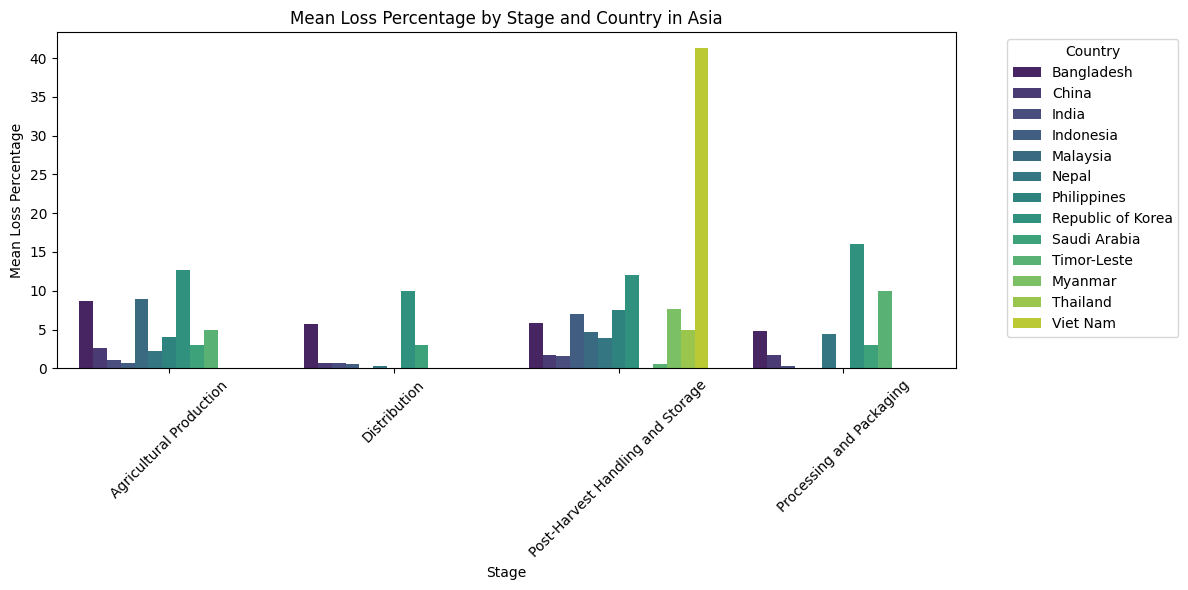

In [ ]:
mean_loss_by_stage_country = asia.groupby(['Continent', 'Stage', 'country'])['loss_percentage'].mean()
mean_loss_by_stage_country = mean_loss_by_stage_country.reset_index()

# Plot a bar chart for each continent, including stages, and countries
plt.figure(figsize=(12, 6))
sns.barplot(x='Stage', y='loss_percentage', hue='country', data=mean_loss_by_stage_country, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('Stage')
plt.ylabel('Mean Loss Percentage')
plt.title('Mean Loss Percentage by Stage and Country in Asia')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

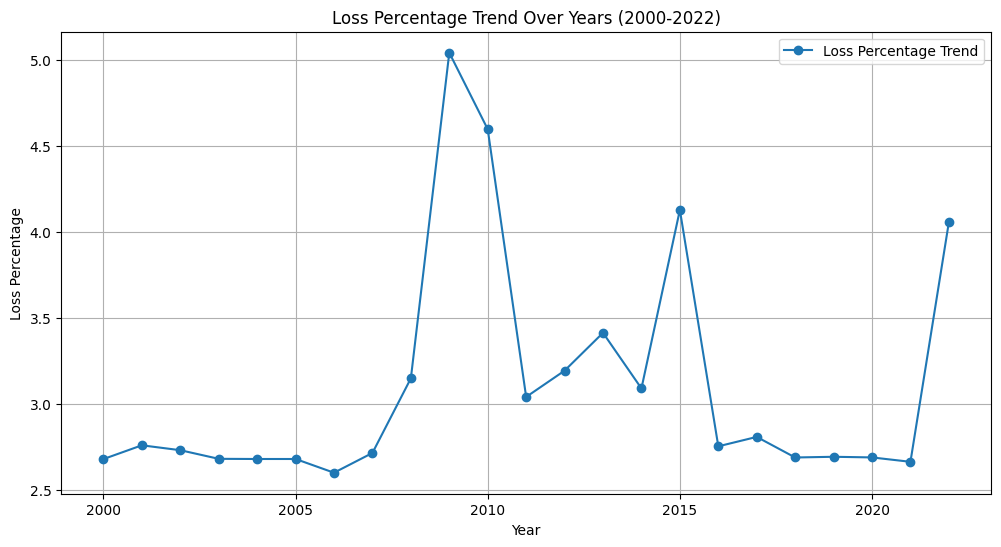

In [ ]:
time_series_data = rice[['year', 'loss_percentage']]
mean_loss_by_year = time_series_data.groupby('year')['loss_percentage'].mean()
time_series = pd.Series(mean_loss_by_year)
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series.values, label='Loss Percentage Trend', marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Loss Percentage")
plt.title("Loss Percentage Trend Over Years (2000-2022)")
plt.legend()
plt.grid(True)
plt.show()

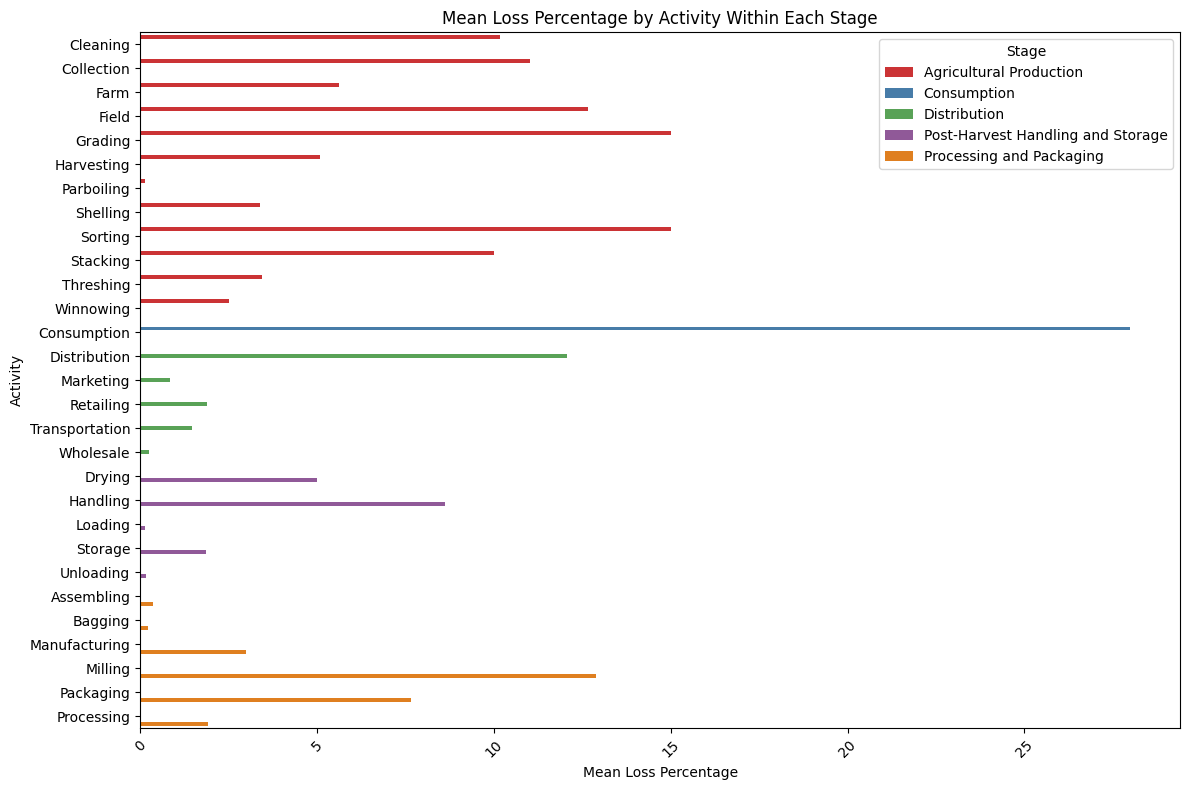

In [ ]:
grouped_data = rice.groupby(['Stage', 'activity'])['loss_percentage'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='loss_percentage', y='activity', data=grouped_data, hue='Stage', palette='Set1')

plt.xlabel('Mean Loss Percentage')
plt.ylabel('Activity')
plt.title('Mean Loss Percentage by Activity Within Each Stage')
plt.xticks(rotation=45)
plt.legend(title='Stage')
plt.tight_layout()
plt.show()


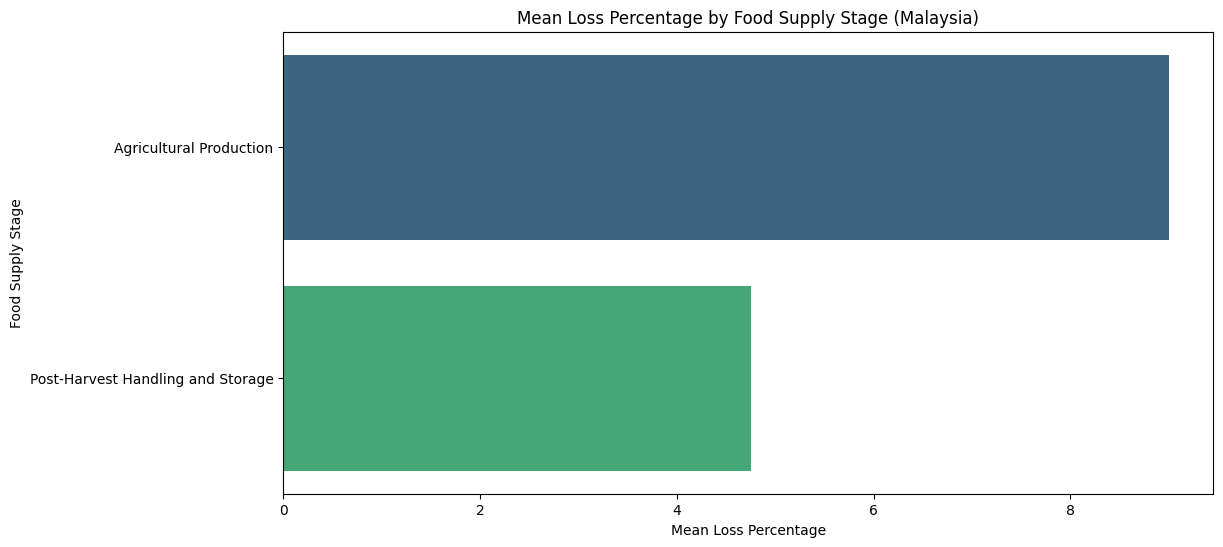

In [ ]:
malaysia = rice[rice["country"]=="Malaysia"]
msia_loss_by_stage = malaysia.groupby('Stage')['loss_percentage'].mean().reset_index()

# Sort the data in descending order by mean loss percentage
msia_loss_by_stage = msia_loss_by_stage.sort_values(by='loss_percentage', ascending=False)

# Create a bar chart for mean loss percentage by food supply stage
plt.figure(figsize=(12, 6))
sns.barplot(x='loss_percentage', y='Stage', data=msia_loss_by_stage, palette='viridis')
plt.xlabel('Mean Loss Percentage')
plt.ylabel('Food Supply Stage')
plt.title('Mean Loss Percentage by Food Supply Stage (Malaysia)')
plt.show()

**Prediction**

In [ ]:
rice.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5818 entries, 0 to 26348
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          5818 non-null   object 
 1   commodity        5818 non-null   object 
 2   year             5818 non-null   int64  
 3   loss_percentage  5818 non-null   float64
 4   loss_quantity    33 non-null     object 
 5   activity         5818 non-null   object 
 6   treatment        473 non-null    object 
 7   cause_of_loss    32 non-null     object 
 8   Stage            5818 non-null   object 
 9   Continent        5818 non-null   object 
dtypes: float64(1), int64(1), object(8)
memory usage: 500.0+ KB


In [ ]:
primary_production = rice[rice['Stage'] == 'Primary Production']
primary_production["activity"].unique()


array([], dtype=object)

In [ ]:
rice.head()

,country,commodity,year,loss_percentage,loss_quantity,activity,treatment,cause_of_loss,Stage,Continent
0,Myanmar,"Rice, milled",2015,1.78,26.12kgs,Storage,"30 days storage, with trapping",Rodents,Post-Harvest Handling and Storage,Asia
1,Myanmar,"Rice, milled",2015,11.77,88.18kgs,Storage,"60 days storage, no trapping",Rodents,Post-Harvest Handling and Storage,Asia
2,Myanmar,"Rice, milled",2015,5.88,44.09kgs,Storage,"30 days storage, no trapping",Rodents,Post-Harvest Handling and Storage,Asia
3,Myanmar,"Rice, milled",2015,3.57,52.24kgs,Storage,"60 days storage, with trapping",Rodents,Post-Harvest Handling and Storage,Asia
4,Myanmar,"Rice, milled",2015,17.65,132.27kgs,Storage,"90 days storage, no trapping",Rodents,Post-Harvest Handling and Storage,Asia


Mean Squared Error: 0.59
Mean Absolute Error: 0.73
R-squared: -0.97


c:\Users\ProUser\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ProUser\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ProUser\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ProUser\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\ProUser\App

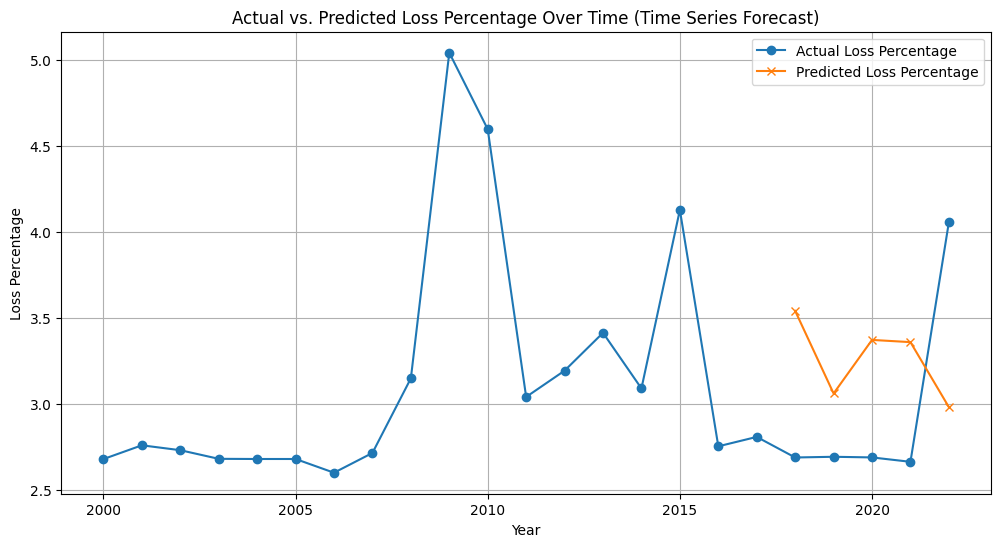

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assuming you already have your dataset 'rice'
# If not, you need to load your dataset here

# Data preprocessing and one-hot encoding of categorical variables
data = pd.get_dummies(rice, columns=['country', 'commodity', 'activity', 'Stage', 'Continent'])

# Extract relevant columns (year and loss_percentage)
time_series_data = data[['year', 'loss_percentage']]

# Group data by year and calculate the mean loss_percentage for each year
mean_loss_by_year = time_series_data.groupby('year')['loss_percentage'].mean()

# Create a time series with years as the index
time_series = pd.Series(mean_loss_by_year)

# Split the time series into training and testing sets
train_size = int(len(time_series) * 0.8)
train_data, test_data = time_series[:train_size], time_series[train_size:]

# Train an ARIMA model
model = ARIMA(train_data, order=(5,1,0))
model_fit = model.fit()

# Make predictions for future years (adjust 'steps' as needed)
steps = len(test_data)  # Number of steps into the future to predict
predictions = model_fit.forecast(steps=steps)

# Evaluate the model's performance on the test set
mse = mean_squared_error(test_data, predictions)
mae = mean_absolute_error(test_data, predictions)
r2 = r2_score(test_data, predictions)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

# Plot the actual and predicted time series
plt.figure(figsize=(12, 6))
plt.plot(time_series.index, time_series.values, label='Actual Loss Percentage', marker='o')
plt.plot(test_data.index, predictions, label='Predicted Loss Percentage', marker='x')
plt.xlabel("Year")
plt.ylabel("Loss Percentage")
plt.title("Actual vs. Predicted Loss Percentage Over Time (Time Series Forecast)")
plt.legend()
plt.grid(True)
plt.show()


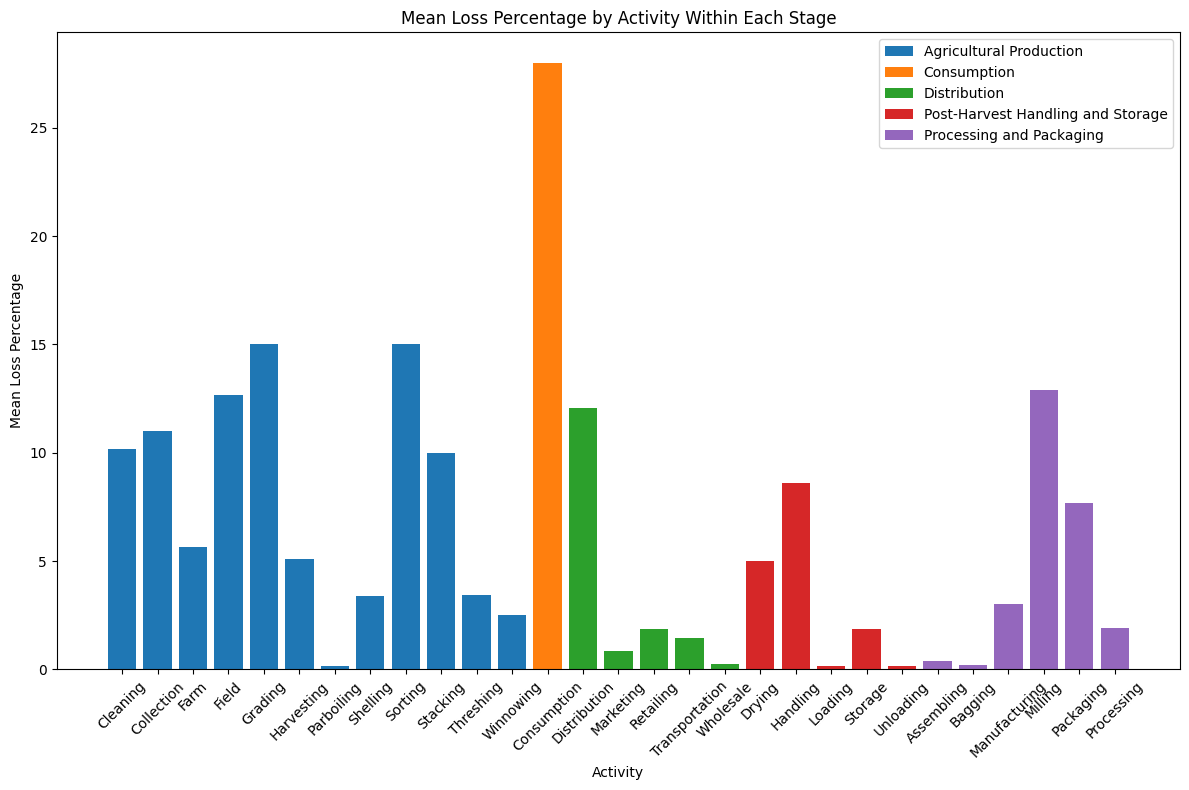

In [ ]:
# Group data by "Stage" and "Activity" and calculate the mean loss percentage
grouped_data = rice.groupby(['Stage', 'activity'])['loss_percentage'].mean().reset_index()

# Create a bar plot for each stage to visualize the mean loss percentage for activities
unique_stages = grouped_data['Stage'].unique()

plt.figure(figsize=(12, 8))

for stage in unique_stages:
    stage_data = grouped_data[grouped_data['Stage'] == stage]
    plt.bar(stage_data['activity'], stage_data['loss_percentage'], label=stage)

plt.xlabel('Activity')
plt.ylabel('Mean Loss Percentage')
plt.title('Mean Loss Percentage by Activity Within Each Stage')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
rice["cause_of_loss"].unique()

array(['Rodents', nan,
       'The results of the milling analysis have been presented in  Table 6. The results showed that SB30 had marginally  higher milling yield (67.32%) than SB10 (66%).  However, the differences between the milling yields of  either the SB30 machine and the locally manufactured  milling machine or that of the SB10 machine and the  locally manufactured milling machine were significant.  The locally manufactured milling machine had the lowest  milling yield (63.33%). This implies that the locally  manufactured milling machine was less efficient as it also  resulted in higher percentage (52.7%) of broken grains  (Table 6). This implies that the local machine produced  less white rice per unit weight of paddy. This resulted in  less recoverable rice and therefore less revenue. SB30 is therefore superior to both SB10 and the Local machine in  terms of milling yield. In spite of the higher milling yield of  SB30, it is still lower than the 67.5% (2010 data)  considered

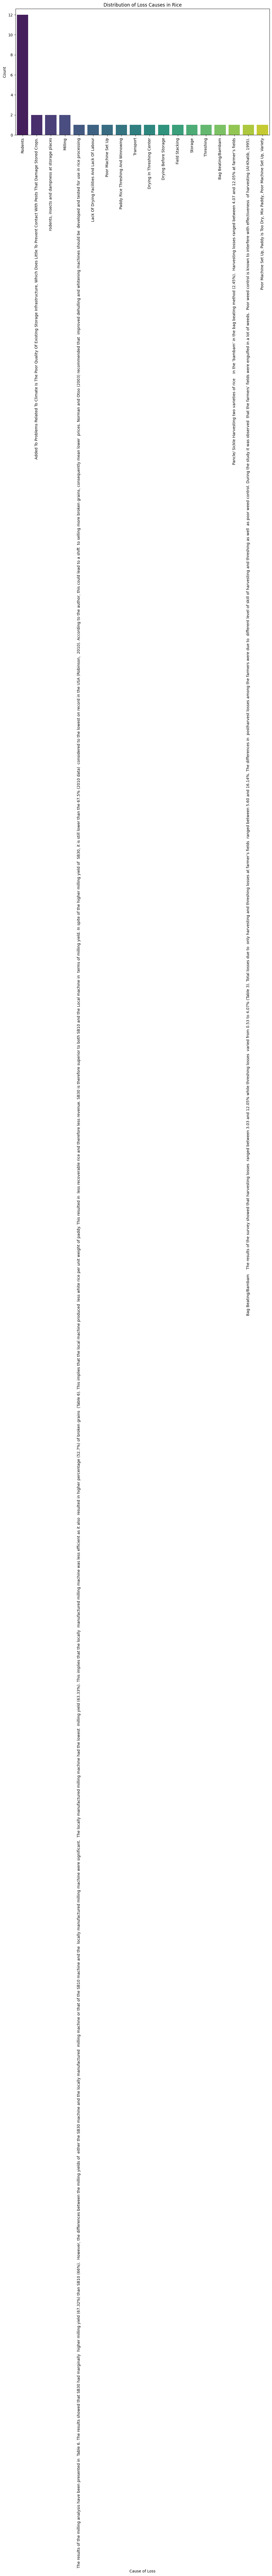

In [ ]:
loss_counts = rice['cause_of_loss'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=loss_counts.index, y=loss_counts.values, palette="viridis")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel("Cause of Loss")
plt.ylabel("Count")
plt.title("Distribution of Loss Causes in Rice")
plt.show()